In [1]:
!pip3 install -U tensorflow==2.0.0 --quiet

     |████████████████████████████████| 86.3MB 73kB/s 
     |████████████████████████████████| 450kB 56.2MB/s 
     |████████████████████████████████| 3.8MB 43.0MB/s 


In [0]:
import tensorflow as tf

In [3]:
from google.colab import files
files.upload()

Saving mnist_dnn_v2.h5 to mnist_dnn_v2.h5


{'mnist_dnn_v2.h5': b'\x89HDF\r\n\x1a\n\x00\x00\x00\x00\x00\x08\x08\x00\x04\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x98\xf1\x0b\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x88\x00\x00\x00\x00\x00\x00\x00\xa8\x02\x00\x00\x00\x00\x00\x00\x01\x00\x07\x00\x01\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x00\x10\x00\x10\x00\x00\x00\x00\x00 \x03\x00\x00\x00\x00\x00\x00h\x01\x00\x00\x00\x00\x00\x00TREE\x00\x00\x01\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [0]:
model = tf.keras.models.load_model('mnist_dnn_v2.h5')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3

In [6]:
_,(testX,testY) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
testX[0].shape

(28, 28)

In [8]:
model.input

<tf.Tensor 'reshape_input:0' shape=(None, 28, 28) dtype=float32>

In [0]:
import numpy as np

In [10]:
np.expand_dims(testX[0],axis=0).shape

(1, 28, 28)

In [11]:
model.input

<tf.Tensor 'reshape_input:0' shape=(None, 28, 28) dtype=float32>

In [0]:
input_data= np.expand_dims(testX[0],axis=0)

In [0]:
prediction = model.predict(tf.cast(input_data, tf.float32))

In [14]:
print(prediction)

[[3.9038354e-05 1.1005929e-07 1.7342107e-07 2.0408093e-05 3.5394734e-07
  3.6544920e-06 1.1427330e-09 9.9935621e-01 1.3672616e-07 5.7988049e-04]]


In [15]:
prediction.shape

(1, 10)

In [16]:
np.sum(prediction)

0.99999994

In [17]:
np.max(prediction)

0.9993562

In [22]:
#Prediction with highest probability

predicted_num=np.argmax(prediction)

print(predicted_num)

7


In [23]:
testY[0]

7

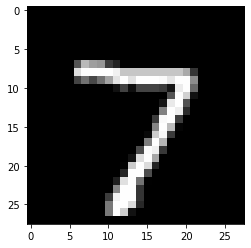

In [24]:
#What is in the image

import matplotlib.pyplot as plt
plt.imshow(testX[0], cmap='gray')